In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [2]:
dataset = pd.read_csv('dataset.csv')

In [3]:
dataset.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


In [5]:
dataset.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


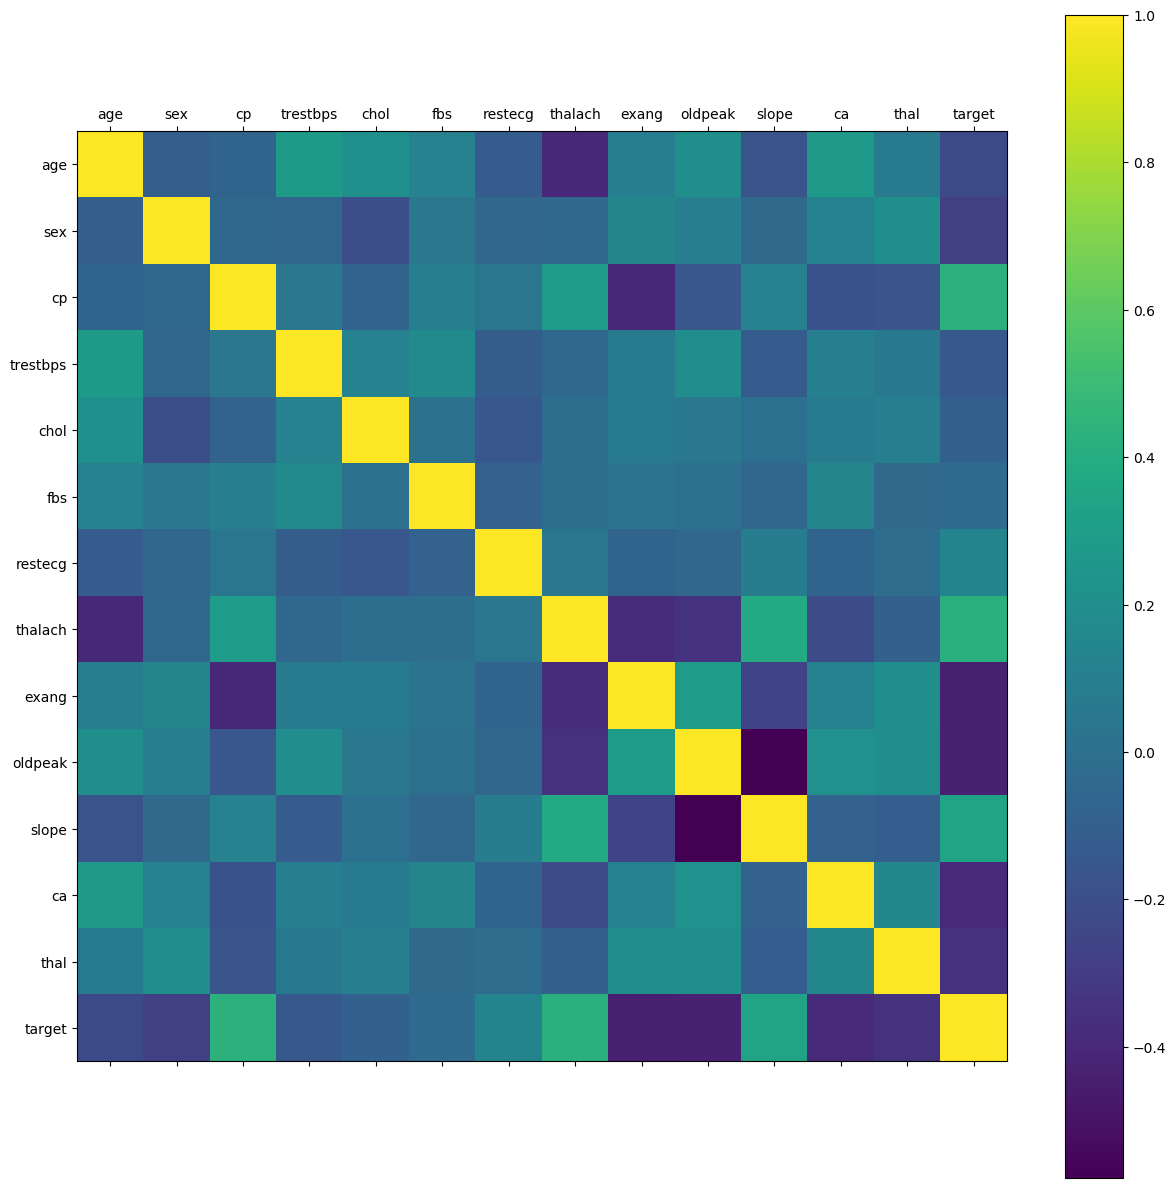

In [6]:
rcParams['figure.figsize'] = 10,15
rcParams["figure.dpi"]= 100
plt.matshow(dataset.corr())
plt.yticks(np.arange(dataset.shape[1]), dataset.columns)
plt.xticks(np.arange(dataset.shape[1]), dataset.columns)
plt.colorbar()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000237B6C536A0>,
      dtype=object)

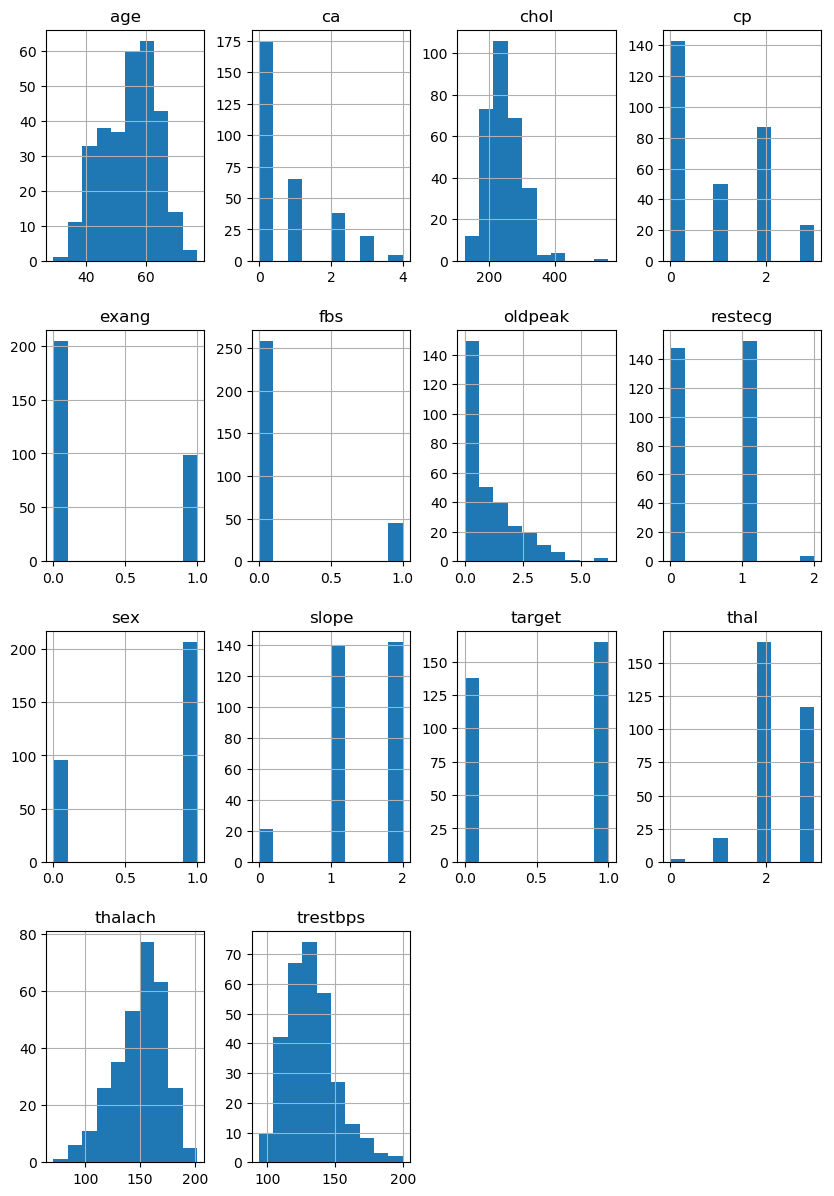

In [7]:
dataset.hist()

In [8]:
dataset['target'].unique()

array([1, 0], dtype=int64)

Text(0.5, 1.0, 'Count of each Target Class')

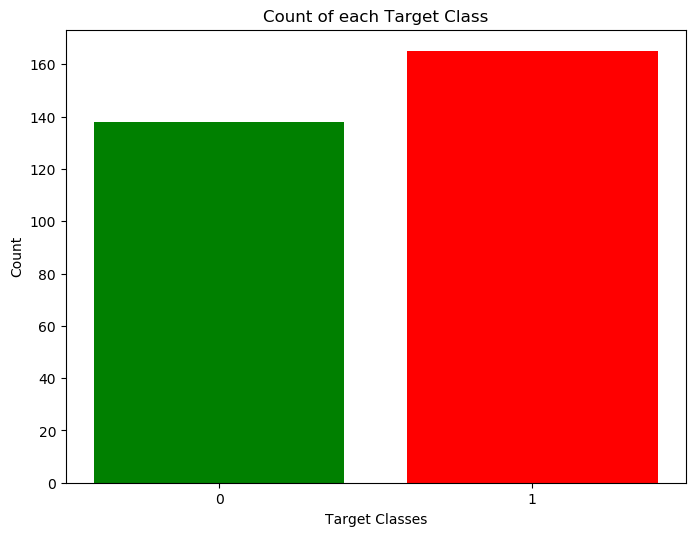

In [9]:
rcParams['figure.figsize'] = 8,6
plt.bar(dataset['target'].unique(), dataset['target'].value_counts(), color = ['red', 'green'])
plt.xticks([0, 1])
plt.xlabel('Target Classes')
plt.ylabel('Count')
plt.title('Count of each Target Class')

Machine Learning

I'll now import train_test_split to split our dataset into training and testing datasets. Then, I'll import all Machine Learning models I'll be using to train and test the data.


In [10]:
y = dataset['target']
X = dataset.drop(['target'], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [11]:
Hyper_paramters={'criterion':['gini', 'entropy'],'max_depth':[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]}
Tree_Gridsearch_paramters=GridSearchCV(DecisionTreeClassifier(),Hyper_paramters,scoring='roc_auc',n_jobs=-1,cv=10,verbose=1)
Tree_crossvalidation=Tree_Gridsearch_paramters.fit(X_train,y_train)
#Tree_crossvalidation=Tree_Gridsearch_paramters.fit(X_train,Ytrain.values.ravel())

print ("The best paramter combination is ")
print(Tree_crossvalidation.best_params_)  #gets best estimator
Final_Model=Tree_crossvalidation.best_estimator_ #gets best estimator
print("The best AUC score was ")
print(Tree_crossvalidation.best_score_)  #gets best score for best estimator # -0.83828599184062269
importances=Tree_crossvalidation.best_estimator_.feature_importances_
importances
#Tree_crossvalidation.cv_results_  #gets summary of results
#Print all importance
Names=list(X_train.columns.values)
for f in range(X_train.shape[1]):
    print((Names[f],  importances[[f]]))

Fitting 10 folds for each of 40 candidates, totalling 400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   18.2s


The best paramter combination is 
{'criterion': 'gini', 'max_depth': 4}
The best AUC score was 
0.850937113850337
('age', array([0.08345966]))
('sex', array([0.07069618]))
('cp', array([0.37691689]))
('trestbps', array([0.]))
('chol', array([0.04217286]))
('fbs', array([0.]))
('restecg', array([0.02320693]))
('thalach', array([0.08716439]))
('exang', array([0.]))
('oldpeak', array([0.03929215]))
('slope', array([0.]))
('ca', array([0.1913626]))
('thal', array([0.08572834]))


[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:   19.8s finished
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


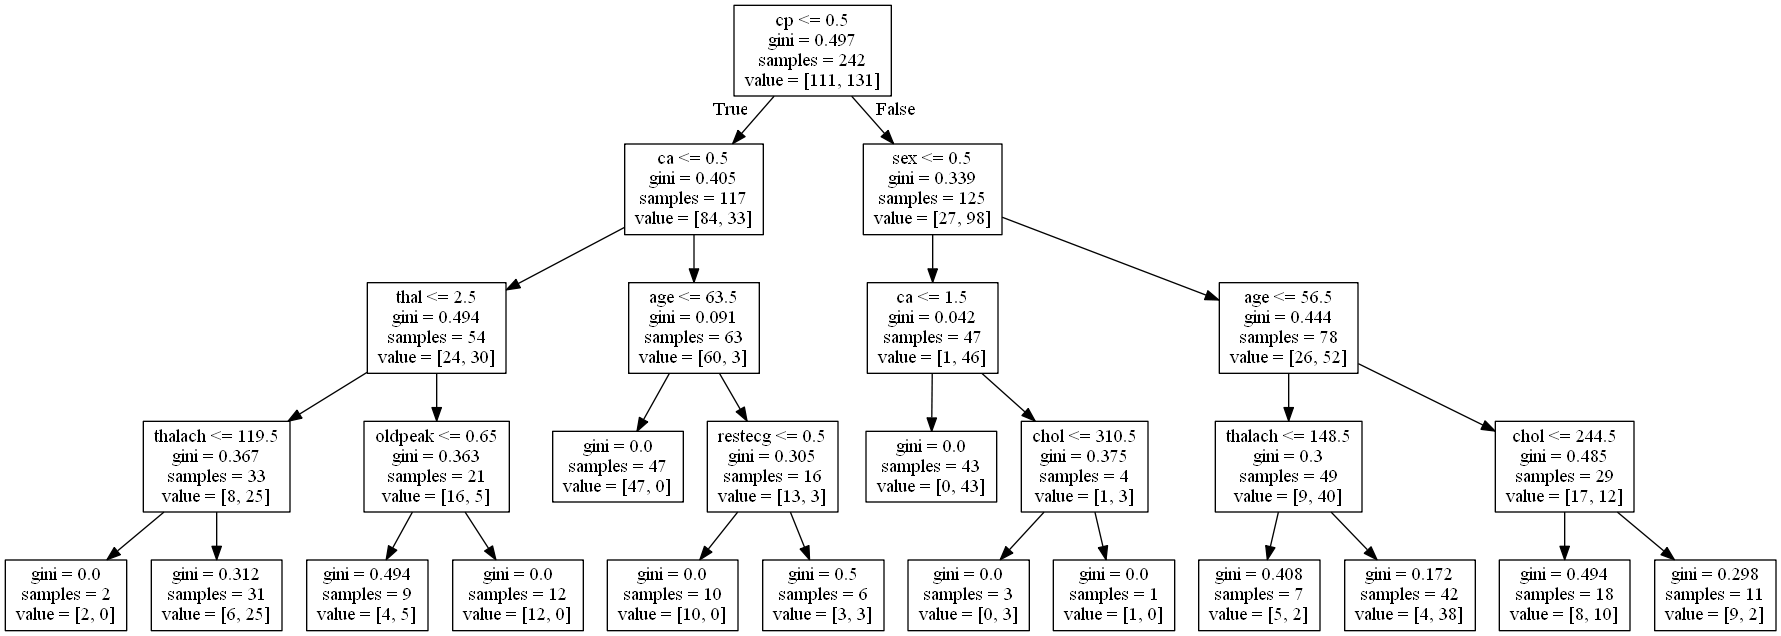

In [14]:
#Method 1 to show the tree
from IPython.display import Image  
from sklearn import tree
#!pip install pydotplus
import pydotplus

# Create DOT data
dot_data = tree.export_graphviz(Final_Model, out_file=None, 
                                feature_names=Names)  
                                #class_names=iris.target_names)
# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)  

# Show graph
Image(graph.create_png())

In [15]:
#Prediction Using the Model
y_pred = Final_Model.predict(X_test)
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
cm1 = confusion_matrix(y_test, y_pred)
print(cm1)
print(classification_report(y_test, y_pred, target_names=["Heart disease", "No Heart Disears"]))

#Calculate sensitivity and specificity

total1=sum(sum(cm1))
accuracy1=(cm1[0,0]+cm1[1,1])/total1
print ('Accuracy : ', accuracy1)

sensitivity1 = cm1[0,0]/(cm1[0,0]+cm1[0,1])
print('Sensitivity : ', sensitivity1 )

specificity1 = cm1[1,1]/(cm1[1,0]+cm1[1,1])
print('Specificity : ', specificity1)

[[21  6]
 [ 6 28]]
                  precision    recall  f1-score   support

   Heart disease       0.78      0.78      0.78        27
No Heart Disears       0.82      0.82      0.82        34

       micro avg       0.80      0.80      0.80        61
       macro avg       0.80      0.80      0.80        61
    weighted avg       0.80      0.80      0.80        61

Accuracy :  0.8032786885245902
Sensitivity :  0.7777777777777778
Specificity :  0.8235294117647058
